# **ASSIGNMENT 5**

## **1. Load and Visualize the Dataset**

####  **Use geodpandas to import the dataset.**

In [6]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Income data, variable; B17003_002E / B17003_001E; income below poverty level last 12 months
#Educ data, vairable; S1501_C01_009E and S1501_C01_003M / S1501_C01_001E + S1501_C01_006E , high school or equavelant 18-24 and 25 plus, respectively (I all merge the two.)
#occ data, variable; S2401_C01_002E / S2401_C01_001E, no of people working in management, science, etc. leevel

In [133]:
data_income = pd.read_excel("C:/Users/reyta/Downloads/shp/income_data.xlsx")
data_educ = pd.read_excel("C:/Users/reyta/Downloads/shp/educ_data.xlsx")
data_occ = pd.read_excel("C:/Users/reyta/Downloads/shp/occ_data.xlsx")

dummy_income = [ "Estimate!!Total:!!Income in the past 12 months below poverty level:"]
dummy_educ = ["Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher", "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"]
dummy_occ = ["Estimate!!Total!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations:"]

total_income = ["Estimate!!Total:"]
total_educ = ["Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years", "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over"]
total_occ = ["Estimate!!Total!!Civilian employed population 16 years and over"]

# My function to clean and prepare my datasets 
def clean_data(df, dummy_var, total):
    
    # I delete the variable names and set labels as column names and reindex
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)

    # Calculate Ns for my total sample and dependent variable, using dependent variable in a binary form
    df['dummy_var'] = df[dummy_var].sum(axis=1)
    df['total'] = df[total].sum(axis=1)
    
    # Rename my columns
    if 'Income' in dummy_var[0]:
        col_name = 'percent_poverty'
    elif 'EDUCATIONAL' in dummy_var[0]:
        col_name = 'percent_bachelor'
    elif 'employed' in dummy_var[0]:
        col_name = 'percent_high_skilled'
    
    #Calculate percentages to make it standardized and comparable
    df[col_name] = pd.to_numeric((df['dummy_var']*100) / df['total'], errors='coerce')

    # Get rid of the unnecessary columns
    for col in df.columns:
        if col not in [col_name, 'Geography', 'Geographic Area Name']:
            df = df.drop(col,axis=1)
    print(df.columns)

    # Some more renaming of the columns
    df = df.rename(columns={'Geography':'GEOID', 'Geographic Area Name':'County'})
    return df 

# Applied my function to three datasets I get columns from, owning bachelor degree, being employed in a high_sklled job, and being below poverty level.
data_income = clean_data(data_income, dummy_income, total_income)
data_educ = clean_data(data_educ, dummy_educ, total_educ)
data_occ = clean_data(data_occ, dummy_occ, total_occ)

#Merge them
data = (data_income.merge(data_educ, on=['GEOID', 'County'], how='inner').merge(data_occ, on=['GEOID', 'County'], how='inner'))

#Standardized the column of GEOID based on which I ll merge the data whit shapefile. The County codes
data['GEOID'] = data['GEOID'].str.replace('0500000US', '')
    
data = data.round(2)
data


Index(['Geography', 'Geographic Area Name', 'percent_poverty'], dtype='object', name=0)
Index(['Geography', 'Geographic Area Name', 'percent_bachelor'], dtype='object', name=0)
Index(['Geography', 'Geographic Area Name', 'percent_high_skilled'], dtype='object', name=0)


,GEOID,County,percent_poverty,percent_bachelor,percent_high_skilled
0,01001,"Autauga County, Alabama",9.65,25.79,35.48
1,01003,"Baldwin County, Alabama",8.94,30.09,35.91
2,01005,"Barbour County, Alabama",16.94,10.53,27.06
3,01007,"Bibb County, Alabama",15.24,10.66,23.62
4,01009,"Blount County, Alabama",13.21,14.22,27.46
...,...,...,...,...,...
3217,72145,"Vega Baja Municipio, Puerto Rico",39.95,22.63,29.75
3218,72147,"Vieques Municipio, Puerto Rico",49.55,11.39,19.93
3219,72149,"Villalba Municipio, Puerto Rico",40.00,20.55,33.31
3220,72151,"Yabucoa Municipio, Puerto Rico",45.79,16.92,23.40


In [9]:
type(data)

pandas.core.frame.DataFrame

####  **Find a shapefile, merge.**

In [203]:
shapefile = gpd.read_file("C:/Users/reyta/Downloads/shp/tl_rd22_us_county.shp")
shapefile

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.0041, -97.01952 42.0049..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.2382, -123.44759 46.24..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.0894, -98.27367 40.0894..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103886631,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.65478 34.66559, -84.65488 34.669..."
3230,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329730563,16913419,+48.7610683,-095.8215042,"POLYGON ((-96.40466 48.80528, -96.40467 48.813..."
3231,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850178949,71697237,+32.6343703,-090.0341603,"POLYGON ((-90.09362 32.70763, -90.0936 32.7076..."
3232,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.69227 32.27106, -101.69221 32.2..."


In [151]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [205]:
row = shapefile.loc[shapefile['NAME'] == 'Autauga']
print(row)

     STATEFP COUNTYFP  COUNTYNS  GEOID     NAME        NAMELSAD LSAD CLASSFP  \
1327      01      001  00161526  01001  Autauga  Autauga County   06      H1   

      MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND    AWATER     INTPTLAT  \
1327  G4020   388  33860     None        A  1539634184  25674812  +32.5322367   

          INTPTLON                                           geometry  
1327  -086.6464395  POLYGON ((-86.9031 32.54063, -86.90312 32.5408...  


In [137]:
data = shapefile.merge(data, on='GEOID')
type(data)

geopandas.geodataframe.GeoDataFrame

####  **Plot a map showing the spatial distribution of counties.**

<Axes: >

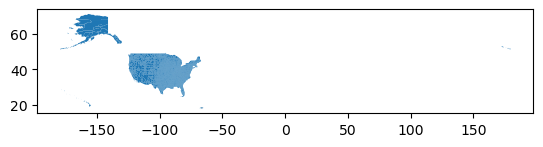

In [89]:
data.plot()

In [23]:
print(shapefile.total_bounds)


[-179.231086  -14.601813  179.859681   71.439786]


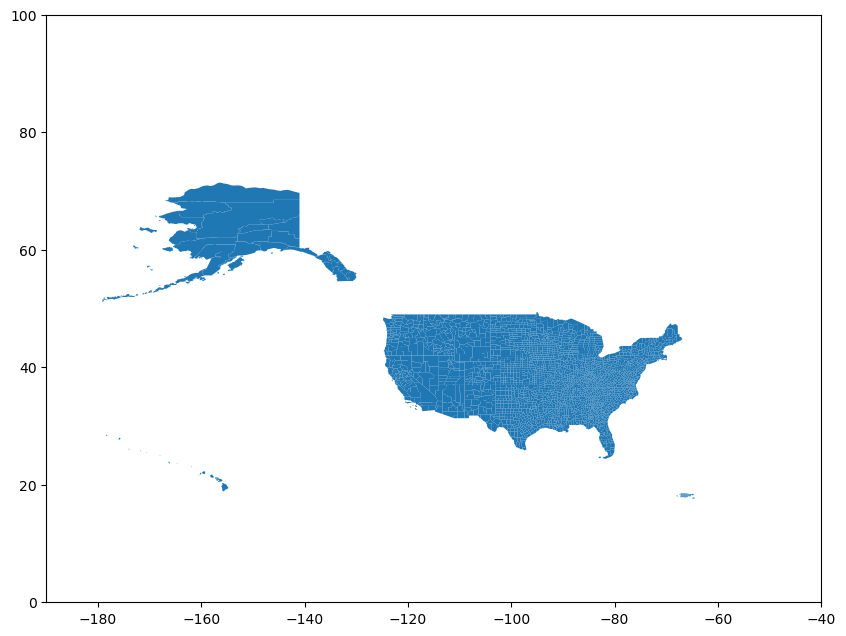

In [55]:
import matplotlib.pyplot as plt

# Plot your shapefile
ax = shapefile.plot(figsize=(10,10))

# I trim out the far distant lands to have a better map than the above one
ax.set_xlim(-190, -40)  
ax.set_ylim(0, 100)  
# Display the plot
plt.show()


<Axes: >

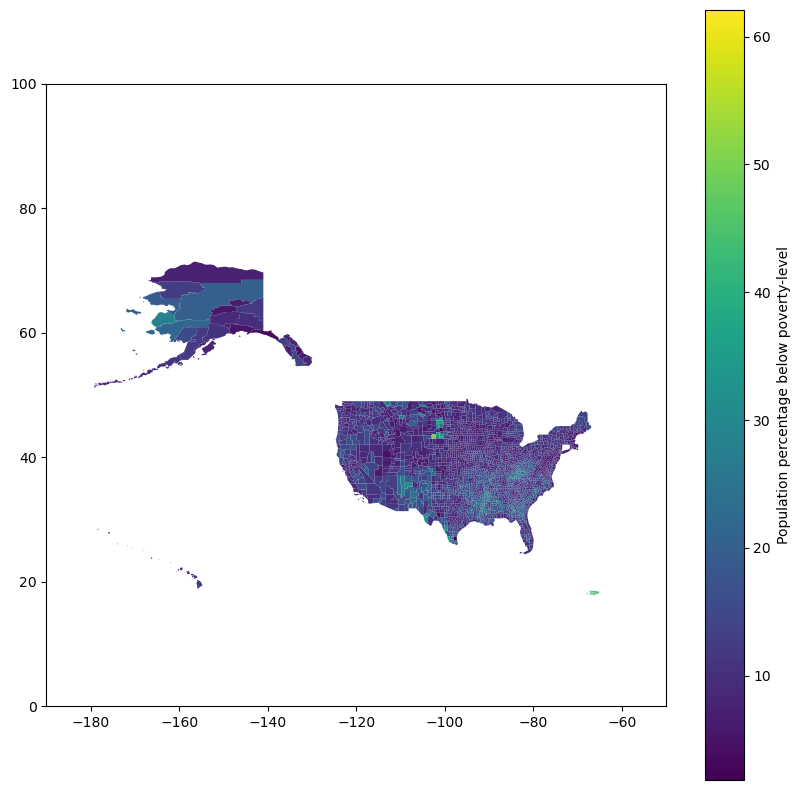

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))

# I trim out the far distant lands to have a better map
ax.set_xlim(-190, -50)  
ax.set_ylim(0, 100)  


data.plot(column='percent_poverty', ax=ax, legend=True, legend_kwds={'label': "Population percentage below poverty-level"})

## **2. Spatial Weight Matrix**

####  **Create a spatial weights matrix for the counties.**

In [77]:
pip install pysal

Note: you may need to restart the kernel to use updated packages.


In [81]:
import pysal as ps
import libpysal
from libpysal.weights import KNN

In [109]:
weight_matrix_knn = KNN.from_shapefile("C:/Users/reyta/Downloads/shp/tl_rd22_us_county.shp", 5)

C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:247: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices)
C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1408: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._part_rings = [Ring(vertices)]
C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1279: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._centroid = Point((cx, cy))
C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\io\iohandlers\pyShpIO.py:232: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  shp = self.type(vertices, holes)
C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1405: FutureWarning: Objects based on

In [111]:
len(weight_matrix_knn.neighbors)

3234

In [113]:
weight_matrix_knn.neighbors

{0: [1197, 2211, 2007, 919, 3187],
 1: [172, 2036, 1489, 2305, 3190],
 2: [1941, 2549, 1675, 1468, 2650],
 3: [1907, 2430, 1383, 340, 766],
 4: [2487, 1171, 2905, 84, 77],
 5: [1404, 1403, 1539, 260, 542],
 6: [109, 2074, 1238, 1897, 500],
 7: [2507, 1966, 2509, 3154, 231],
 8: [2173, 2823, 552, 1372, 1090],
 9: [2757, 2193, 3125, 66, 2723],
 10: [2624, 2861, 3182, 2661, 14],
 11: [1264, 1369, 789, 2592, 2741],
 12: [1082, 2991, 2015, 2190, 982],
 13: [1092, 496, 676, 1705, 1369],
 14: [2322, 2661, 3115, 2624, 679],
 15: [2285, 105, 2889, 312, 2878],
 16: [2614, 2458, 3072, 1568, 3003],
 17: [802, 1042, 514, 1623, 553],
 18: [1813, 741, 1213, 1997, 2218],
 19: [822, 836, 2616, 2440, 2804],
 20: [926, 1890, 3002, 1112, 2010],
 21: [2961, 154, 2944, 3194, 2968],
 22: [2017, 715, 407, 1269, 2811],
 23: [1763, 59, 1470, 1062, 262],
 24: [144, 848, 2884, 942, 120],
 25: [1838, 44, 1306, 1550, 1604],
 26: [2360, 1315, 2886, 119, 570],
 27: [1699, 939, 519, 1199, 28],
 28: [998, 328, 1699, 12

In [115]:
weight_matrix_knn.neighbors[45]

[206, 1207, 2708, 3081, 2985]

## **3. Spatial Autocorrelation**

####  **Search and learn what is Moran's I.**

Moran's I is a spesific way of calculation of spatial autocorrelation, based on weightining matrix. It aims to decide whether the neighbours correlates with the place of focus in terrms of the measured variable or not and if does what is the direction of the impact. If the Moran's I value is greater than 0 it is positively correlated with the neighbours, if smaller than 0 it is negative correlation and if close or equal to zero, it is understood to be random and not correlate. Also, p-value is reported to check statistical significane of the Moran's I statistic.

####  **Calculate Moran’s I for a socio-economic indicator (e.g., income levels)**

In [123]:
from esda.moran import Moran
import numpy as np

# extracting dependent variable as numpy array
y = data['percent_poverty'].values

# I used Queen model this time for weightening matrix
w = libpysal.weights.Queen.from_dataframe(data)  
w.transform = 'r'

# Calculate Moran's I
moran = Moran(y, w)

print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")


C:\Users\reyta\AppData\Local\Temp\ipykernel_8880\315555218.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(data)  # Queen contiguity weights


('WARNING: ', 363, ' is an island (no neighbors)')
('WARNING: ', 2064, ' is an island (no neighbors)')
('WARNING: ', 2717, ' is an island (no neighbors)')
Moran's I: 0.7298812325891899
p-value: 0.001


C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 363, 2064, 2717.
  W.__init__(self, neighbors, ids=ids, **kw)


Here we see that we have a 0.7 autocorrelation which is considerably high. and it is statistically significant at .001 level, i.e. number of people who report to have income below poverty levels in a county highly autocorrelates with the numbers observed in neighbours, at 99% confidence interval.


## **4. Spatial Regression**

####  **Run a spatial regression model with a socio-economiic variable as the dependent variable.**

In [169]:
import spreg

In [173]:
data = data.dropna(subset=['percent_poverty', 'percent_bachelor', 'percent_high_skilled'])
len(data)

3213

In [183]:
y = data['percent_poverty'].values
y

array([ 6.44, 13.62, 18.41, ...,  8.78, 13.53, 14.95])

In [181]:
x_OLS = data[['percent_bachelor', 'percent_high_skilled']].values
x_OLS

array([[23.08, 36.24],
       [21.22, 23.98],
       [ 8.68, 20.95],
       ...,
       [43.9 , 46.83],
       [13.92, 34.77],
       [16.35, 37.31]])

In [187]:
wm = libpysal.weights.Queen.from_dataframe(data)
wm.transform = 'r'

C:\Users\reyta\AppData\Local\Temp\ipykernel_8880\1372744106.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(data)


('WARNING: ', 363, ' is an island (no neighbors)')
('WARNING: ', 2064, ' is an island (no neighbors)')
('WARNING: ', 2717, ' is an island (no neighbors)')


C:\Users\reyta\anaconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 363, 2064, 2717.
  W.__init__(self, neighbors, ids=ids, **kw)


In [191]:
model_OLS = spreg.OLS(
    y,
    x_OLS,
    w=wq,
    spat_diag=True,
    name_x=['percent_bachelor', 'percent_high_skilled'], 
    name_y='Bolsa Familia'
)

print(model_OLS.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Bolsa Familia                Number of Observations:        3213
Mean dependent var  :     12.9474                Number of Variables   :           3
S.D. dependent var  :      6.7745                Degrees of Freedom    :        3210
R-squared           :      0.1827
Adjusted R-squared  :      0.1822
Sum squared residual:      120484                F-statistic           :    358.7289
Sigma-square        :      37.534                Prob(F-statistic)     :  2.464e-141
S.E. of regression  :       6.126                Log likelihood        :  -10381.504
Sigma-square ML     :      37.499                Akaike info criterion :   20769.009
S.E of regression ML:      6.1236                Schwarz criterion     :   20787.234

-----------------------------------------------------------

####  **Interpret the coefficients briefly in comments.**

Both of my independent variables, number of people having bachelor degree and number of people employed in high_skilled jobs, seems to have statistically significant, negative impact on the number of people with income below poverty level. 

## **5. Visualisation**

####  **Create a choropleth map showing the distribution of the selected socio-economic indicator.**

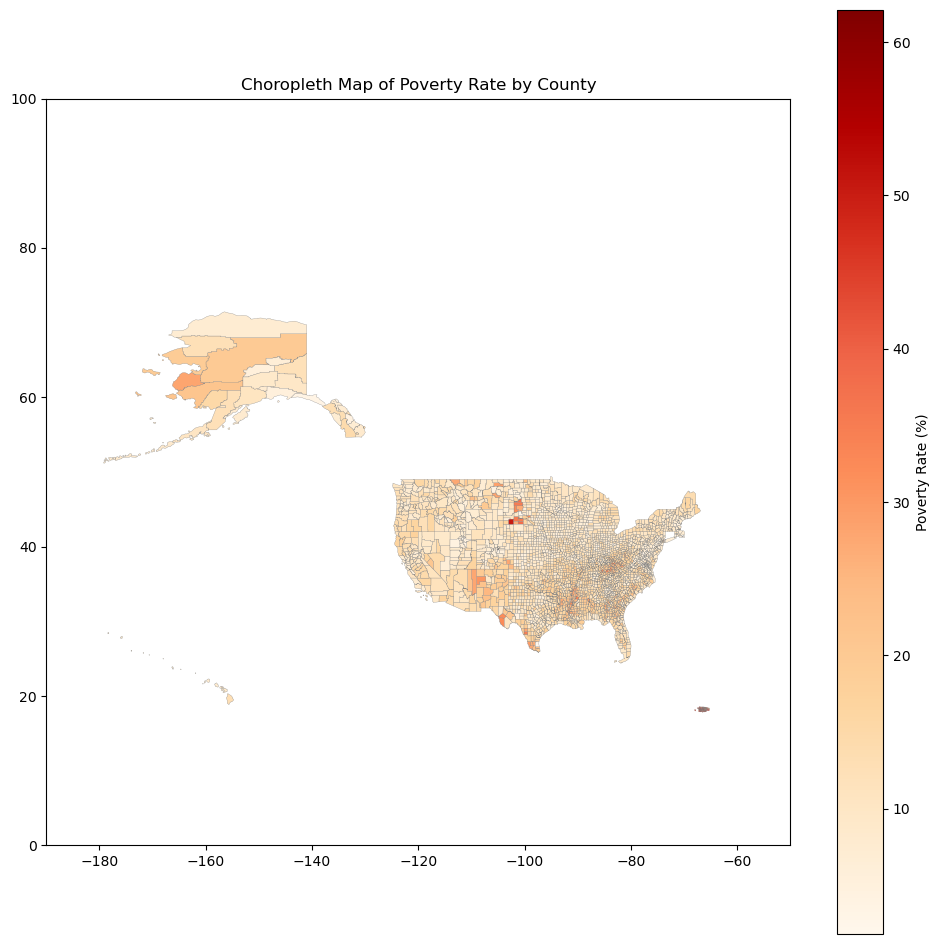

In [201]:
# My dependent vairbale
dependent_variable = 'percent_poverty'  

fig, ax = plt.subplots(figsize=(12, 12))  
data.plot(column=Dependent_variable, 
         cmap='OrRd',  
         legend=True,
         legend_kwds={'label': "Poverty Rate (%)"},
         edgecolor='gray',
         linewidth=0.2,
         ax=ax)

# I trim out the far distant lands to have a better map
ax.set_xlim(-190, -50)  
ax.set_ylim(0, 100)  

plt.title('Choropleth Map of Poverty Percentage by County')

plt.show()
